**Dicoding Proyek Pertama ML Terapan: Predictive Analysis**

Notebook kali ini adalah program dan dokumentasi untuk proyek pertama untuk kelas Machine Learning Terapan. Modul ini akan berisi
1. Domain Proyek: Berisi Latar Belakang dan alasan masalah tersebut harus diselesaikan.
2. Business Understanding: berisi Problem Statement, Goals, dan Solution Statement.
3. Data Understanding: berisi tentang penjelasan informasi dari data yang digunakan.
4. Data Preparation: berisi tentang teknik persiapan data sebelum modeling.
5. Modeling: berisi tentan model ML yang digunakan untuk memecahkan masalah.
6. Evaluasi: berisi tentang penjelasan metriks evaluasi yang digunakan.

**1. Domain Proyek**

**- Tema : Kesehatan**

**- Judul: Prediksi Penyakit Stroke Menggunakan KNN, Random Forest, Logistic Regression**

**- Latar Belakang**

Stroke adalah salah satu penyakit tidak menular yang paling banyak dialami oleh manusia. Menurut World Health Organization, pada tahun 2017 stroke menjadi penyebab kematian ketiga di dunia. Di Indonesia, stroke menjadi penyebab pertama kematian di rumah sakit. Sayangnya, penyakit ini kebanyakan diketahui setelah penderita menderita stroke tingkat akhir yang memiliki kemungkinan untuk sembuh sangat kecil.

Meskipun menjadi suatu ancaman penyakit yang banyak menjangkit manusia, penelitian mengenai prediksi penyakit ini masih sedikit di Indonesia.  Berdasarkan data di atas, maka diperlukan suatu sistem yang dapat memprediksi kemungkinan penyakit stroke berdasarkan gejala-gejala yang dirasakan oleh pasien. Dengan adanya solusi ini, diharapkan dapat membantu dokter untuk mendiagnosis penyakit lebih awal dan memberikan terapi serta edukasi tentang penyakit stroke.

**- Alasan Penyelesaian Masalah**

Penyakit stroke adalah salah satu penyakit mematikan yang sering menjangkit manusia. Kebanyakan kasus stroke diketahui setelah pasien menderita stroke tahap akhir. Padahal, penyakit ini memerlukan deteksi awal dan penanganan yang cepat agar stroke tidak memengaruhi bagian syaraf dan tubuh yang lain. Oleh karena itu, prediksi awal sangat menentukan dalam penanganan penyakit ini serta meningkatkan kemungkinan hidup dari penderita.

**- Referensi**

Referensi dari permasalahan ini berasal dari jurnal "Prediksi Risiko Kematian Pasien Stroke Perdarahan dengan Menggunakan Teknik Klasifikasi Data Mining" oleh Indarto, Ema Utami, dan Suwanto Raharjo. Jurnal dapat diakses pada : http://www.e-journal.janabadra.ac.id/index.php/informasiinteraktif/article/view/1172/790

**2. Business Understanding**

**Problem Statement**

1. Penyakit stroke adalah penyakit yang sering diderita oleh manusia namun masih jarang terdeteksi saat gejala awal sehingga dapat menyebabkan komplikasi lebih lanjut.

**Goals**

1. Diperlukan suatu sistem yang dapat memprediksi apakah seseorang menderita penyakit stroke berdasarkan gejala ataupun situasi yang dialami oleh penderita agar dapat dilakukan penanganan secepat mungkin.


**Solution Statement**
1. Untuk membuat sistem prediksi kali ini, saya menggunakan 3 algoritma sebagai perbandingan yaitu Logistic Regression, KNN, dan Random Forest. Untuk menentukan algoritma yang lebih baik, saya menggunakan metriks evaluasi yaitu MSE(Mean Squared Error). Saya memilih MSE karena poin penting dari prediksi penyakit stroke adalah mengurangi kemungkinan salah diagnosis atau mengurangi False Negative dan False Positive.

**3. Data Understanding**

3.1. Loading Data

3.2. EDA-Deskripsi Variabel

3.3. EDA-Menangani Missing Value dan Outliers

3.4. EDA-Univariate Analysis

3.5. EDA-Multivariate Analysis


**3.1. Loading Data**

**- Import package yang diperlukan**

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

**- Membaca data CSV dan mengubahnya menjadi DataFrame**

In [50]:
# Mengambil data dari dataset
url = 'https://raw.githubusercontent.com/jonywony/Dicoding-ML-Terapan-Submission1/main/Dataset/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(url)
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [51]:
#Menghapus kolom id karena tidak akan masuk ke dalam proses klasifikasi
df.drop('id', axis=1, inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


**Penjelasan**

Dari dataset yang saya ambil dari Kaggle dengan judul "Stroke Prediction Dataset" (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset) dapat dilihat bahwa terdapat 5110 data dan 12 kolom yang diguanakan yaitu:
1. **id**: merupakan identifikasi unik untuk setiap pasien (numerik)
2. **gender**: merupakan data jenis kelamin pasien apakah laki-laki('Male'), perempuan('Female'), atau lainnya ('Other') (kategorik)
3. **age**: umur dari pasien (numerik)
4. **hypertension**: merupakan status apakah pasien memiliki hipertensi(1) atau tidak(0) (kategorik)
5. **heart_disease**: merupakan status apakah pasien memiliki penyakit jantung(1) atau tidak(0) (kategorik)
6. **ever_married**: merupakan status pernikahan apakah sudah pernah menikah('Yes') atau belum('no') (kategorik)
7. **work_type**: merupakan status pekerjaan apakah anak-anak('children'), pegawai pemerintahan('Govt_jov'), tidak pernah bekerja('Never_worked'), bekerja di perusahaan('private'), atau self-employed('self-employed') (kategorik)
8. **Residence_type**: merupakan status dimana pasien tinggal apakah di desa('Rural') atau kota('Urban') (kategorik)
9. **avg_glucose_level**: merupakan rata-rata level glukosa dalam darah (numerik)
10. **bmi**: merupakan indeks massa tubuh (numerik)
11. **smoking_status**:merupakan status perokok pasien apakah berhenti merokok('formerly_smoked'), tidak merokok('never_smoked'), merokok('smoked'), atau tidak tahu('Unknown')
12. **stroke**: merupakan status apakah seseorang terkena stroke(1) atau tidak(0) (kategorik)

***note**: kolom id dihilangkan karena tidak akan masuk ke dalam proses klasifikasi nanti

**3.2. EDA-Deskripsi Variabel**

In [52]:
#Mengecek informasi tentang tipe data yang terdapat pada setiap kolom di dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [53]:
#Mengecek ringkasan statistik dataset
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [54]:
#Mengubah tipe data hypertension, heart_disease, dan stroke menjadi object
df['hypertension'] = df['hypertension'].astype(dtype='object')
df['heart_disease'] = df['heart_disease'].astype(dtype='object')
df['stroke'] = df['stroke'].astype(dtype='object')
df.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


**Penjelasan**

Eksplorasi variabel data menggunakan fungsi **info()** dari dataframe akan mengeluarkan informasi tentang banyaknya data yang tidak null dan tipe data yang ada pada data, yaitu:
1. **gender**: memiliki tipe data object
2. **age**: memiliki tipe data float
3. **hypertension**: memiliki tipe data int
4. **heart_disease**: memiliki tipe data int
5. **ever_married**: memiliki tipe data object
6. **work_type**: memiliki tipe data object
7. **Residence_type**: memiliki tipe data object
8. **avg_glucose_level**: memiliki tipe data float
9. **bmi**: memiliki tipe data int
10. **smoking_status**:memiliki tipe data object
11. **stroke**: memiliki tipe data int

Pada bagian Loading Data dijelaskan bahwa atribut hypertension, heart_disease, dan stroke adalah data kategorik namun pada dataframe memiliki nilai int. Oleh karena itu, pertama-tama kita akan mengubah tipe data ketiganya menjadi object dengan menggunakan fungsi **astype(dtype='object')**. Hasil dari transformasi ini adalah:
1. **gender**: memiliki tipe data object
2. **age**: memiliki tipe data float
3. **hypertension**: memiliki tipe data **object**
4. **heart_disease**: memiliki tipe data **object**
5. **ever_married**: memiliki tipe data object
6. **work_type**: memiliki tipe data object
7. **Residence_type**: memiliki tipe data object
8. **avg_glucose_level**: memiliki tipe data float
9. **bmi**: memiliki tipe data int
10. **smoking_status**:memiliki tipe data object
11. **stroke**: memiliki tipe data **object**

***note**: dari sini juga dapat dilihat bahwa atribut bmi memiliki missing value, hal ini akan ditangani pada proses selanjutnya



**3.3. EDA-Penanganan Missing Value dan outliers**

**Penanganan Missing Value**

In [55]:
#Cek apakah ada missing Value atau tidak
df.isna().sum().sort_values(ascending=False)[:10]

bmi                  201
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
smoking_status         0
dtype: int64

In [56]:
#Menangani Missing Value pada kolom bmi dengan menggantinya dengan median untuk mempertahankan distribusi data
df['bmi'].fillna(value=df['bmi'].median() ,inplace=True)

In [57]:
#Cek apakah ada missing Value atau tidak
df.isna().sum().sort_values(ascending=False)[:10]

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [58]:
#Cek kembali deskripsi statistik data
df.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.862035
std,22.612647,45.283560,7.699562
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


In [59]:
#Cek bentuk data
df.shape

(5110, 11)

**Penanganan Outlier**

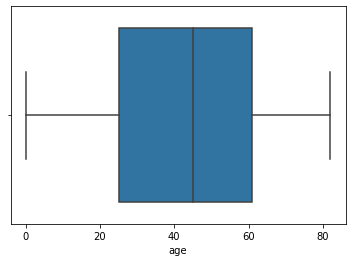

In [60]:
#Cek apakah ada outlier pada kolom age
sns.boxplot(x=df['age'])

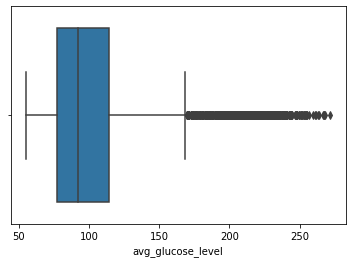

In [61]:
#Cek apakah ada outlier pada kolom age
sns.boxplot(x=df['avg_glucose_level'])

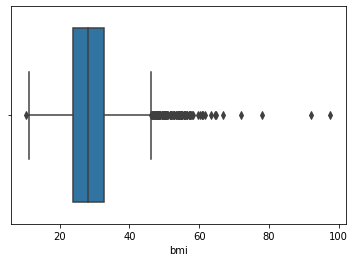

In [62]:
#Cek apakah ada outlier pada kolom age
sns.boxplot(x=df['bmi'])

In [63]:
#Menghitung Interuartile Range sebagai acuan untuk menghapus outlier
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR=Q3-Q1

#Melakukan subset dan menghapus data outlier
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

#Cek ukuran dataset setelah proses drop outliers
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys


(4391, 11)

**Penjelasan**


**- Penanganan Missing Value**
Untuk menangani Missing Value, sebelumnya kita akan mengidentifikasi apakah ada missing value pada data menggunakan fungsi **isna().sum().sort_values(ascending=False)**. Dapat dilihat bahwa terdapat 201 missing value pada atribut bmi. Setelah itu, saya menggunakan fungsi **fillna()** dengan value median dari bmi. Saya memutuskan untuk mengisi data yang kosong tersebut dengan mengunakan median Karena memiliki jumlah yang sangat banyak dan untuk mempertahankan distribusi data.



**- Penanganan Outlier**
Dengan menggunakan boxplot pada data numerik ('bmi', 'avg_glucose_level', dan 'age') dapat dilihat bahwa pada atribut **bmi** dan **avg_glucose_level** memiliki outlier yang ditandai dengan titik-titik hitam diluar boxplot. Untuk menanganinya, saya menggunakan IQR(Inter Quartile Range) sebagai parameter untuk menghapus outlier, jika ada data yang nilainya kurang dari Q1-1.5XIQR atau data yang nilainya lebih dari Q3+1.5XIQR maka data tersebut akan dianggap outlier dan dihilangkan.

Setelah melalui dua proses tersebut data yang telah dibersihkan menjadi 4391 data.




**3.4. EDA-Univariate Analysis**

**- Data Kategorik**

In [64]:
#Membagi kolom pada dataframe menjadi kolom kategorik dan numerik
numerical_features = ['age', 'avg_glucose_level', 'bmi']
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

        jumlah sampel  persentase
Female           2590        59.0
Male             1800        41.0
Other               1         0.0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


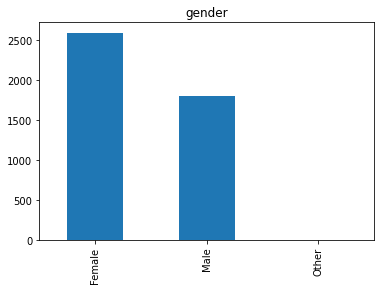

In [65]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature);

#Menghilangkan nilai other dari dataset
df.drop(df[df['gender']=='Other'].index,inplace=True)

   jumlah sampel  persentase
0           4064        92.6
1            326         7.4


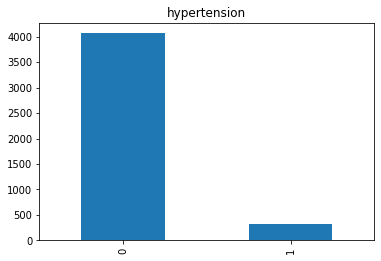

In [66]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
0           4218        96.1
1            172         3.9


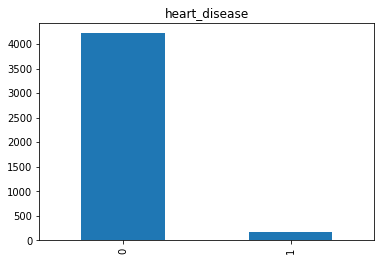

In [67]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature);

     jumlah sampel  persentase
Yes           2735        62.3
No            1655        37.7


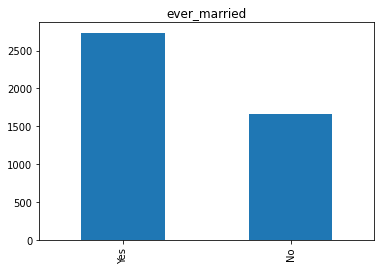

In [68]:
feature = categorical_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature);

               jumlah sampel  persentase
Private                 2481        56.5
children                 674        15.4
Self-employed            661        15.1
Govt_job                 552        12.6
Never_worked              22         0.5


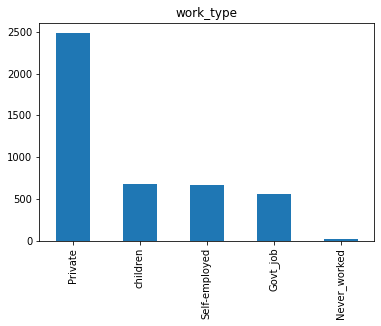

In [69]:
feature = categorical_features[4]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature);

       jumlah sampel  persentase
Urban           2230        50.8
Rural           2160        49.2


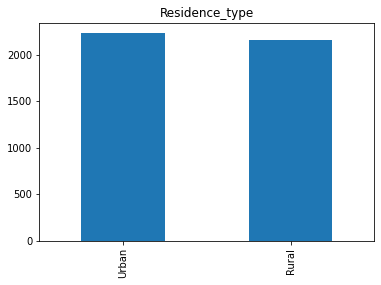

In [70]:
feature = categorical_features[5]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature);

                 jumlah sampel  persentase
never smoked              1595        36.3
Unknown                   1418        32.3
formerly smoked            707        16.1
smokes                     670        15.3


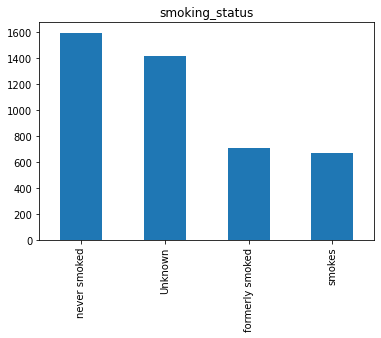

In [71]:
feature = categorical_features[6]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature);

   jumlah sampel  persentase
0           4225        96.2
1            165         3.8


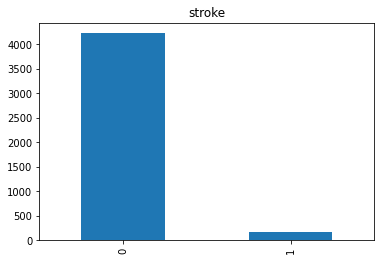

In [72]:
feature = categorical_features[7]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature);

**- Data Numerik**

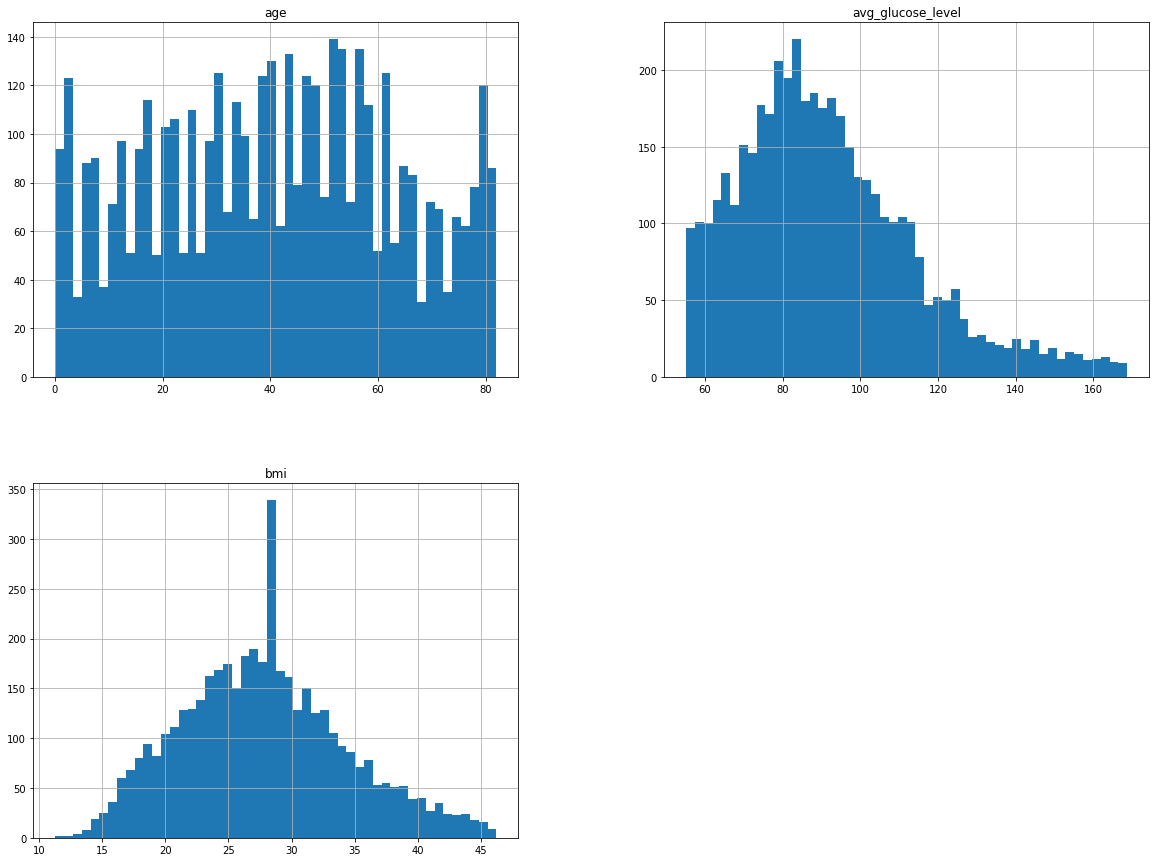

In [73]:
#Melihat persebaran data numerik
df[numerical_features].hist(bins=50, figsize=(20,15))
plt.show()

**Penjelasan**

**-Data Kategorik**

Pada data kategorik yang terdiri dari atribut ('gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke') akan dilakukan univariate analysis dengan mengetaui sebarannya. Didapatkan hasil sebagai berikut:
1. **gender**: memiliki sebaran yang hampir merata antara kategori "Male" dan "Female". Kategori "Other" akan dihilangkan karena hanya memiliki 1 data saja.
2. **hypertension**: memiliki sebaran yang tidak merata antara pasien yang memiliki hipertensi(1) dengan yang tidak(0). Pasien yang tidak memiliki hipertensi jauh lebih banyak.
3. **heart_disease**: memiliki sebaran yang tidak merata antara pasien yang memiliki penyakit jantung(1) dengan yang tidak(0). Pasien yang tidak memiliki penyakit jantung jauh lebih banyak.
4. **ever_married**: memiliki sebaran yang hampir merata antara kategori "Yes" dan "No".
5. **work_type**: memiliki sebaran yang tidak rata antara setiap data kategorik dimana kebanyakan data ada pada satu kategori yaitu "private" sementara kategori "never_worked" sangat sedikit.
6. **Residence_type**: memiliki sebaran yang hampir merata antara kategori "Urban" dan "Rural".
7. **smoking_status**:memiliki sebaran yang hampir merata antara setiap kategori.
8. **stroke**: memiliki sebaran yang tidak merata dimana kebanyakan data adalah pasien yang tidak mengalami stroke(0).

**- Data Numerik**

1. **age**: memiliki sebaran data yang random dimana hampir semua distribusi memiliki nilai yang hampir sama.
2. **avg_glucose_level**: memiliki sebaran yang condong/skewed ke kiri.
3. **bmi**: memiliki sebaran yang mendekati normal.

**3.5. EDA-Multivariate Analysis**

**- Fitur Kategorik**

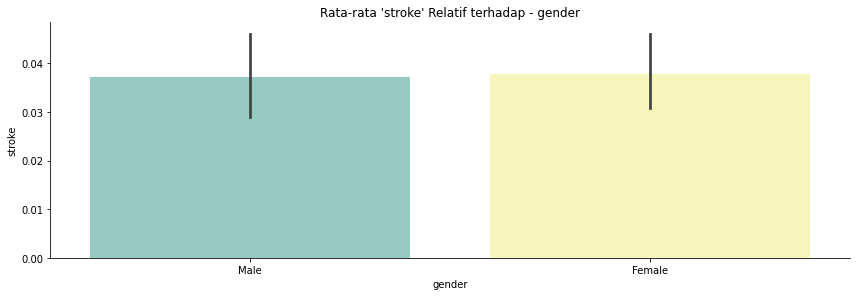

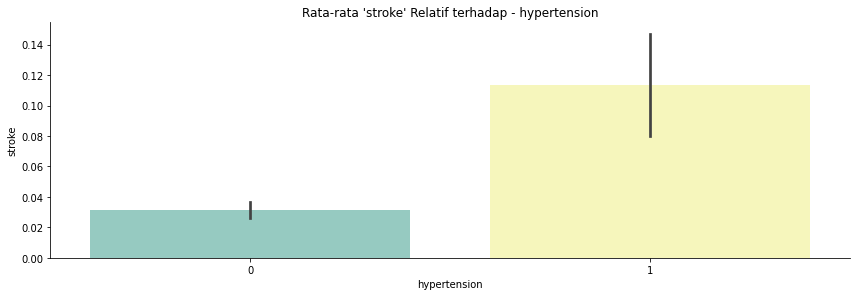

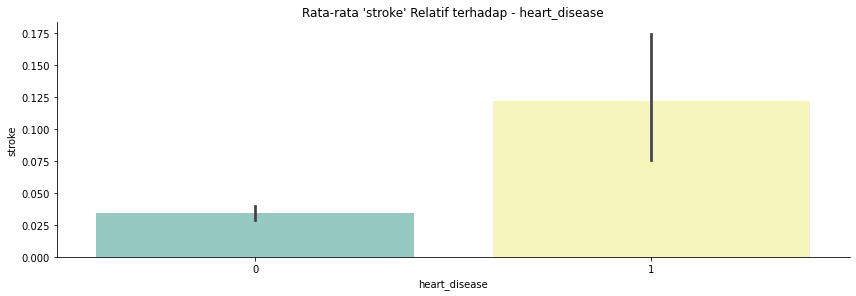

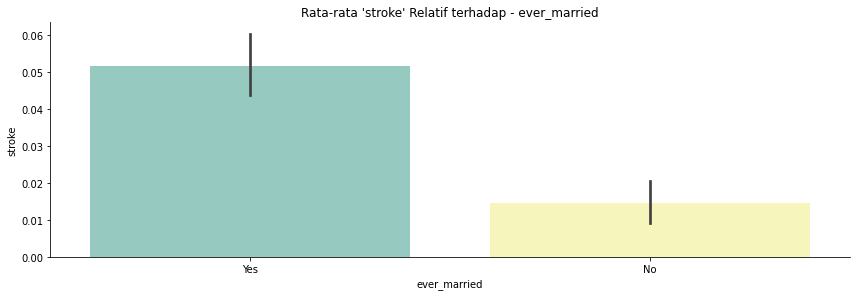

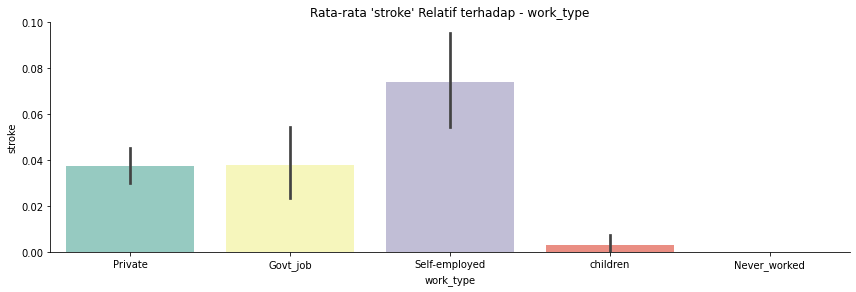

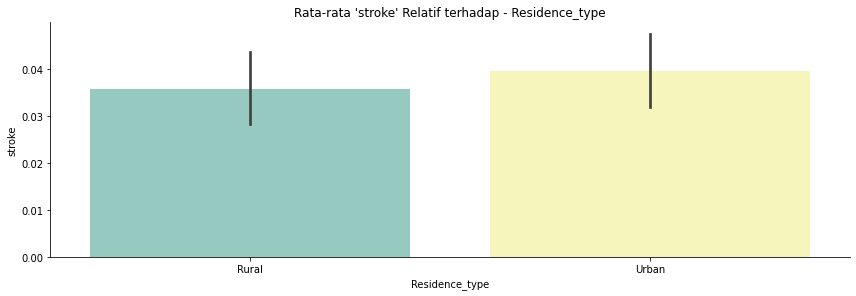

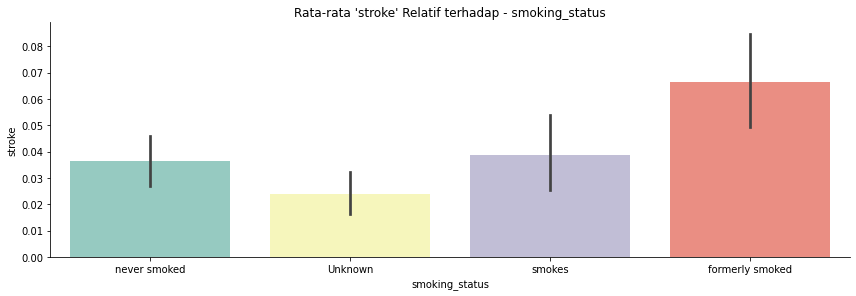

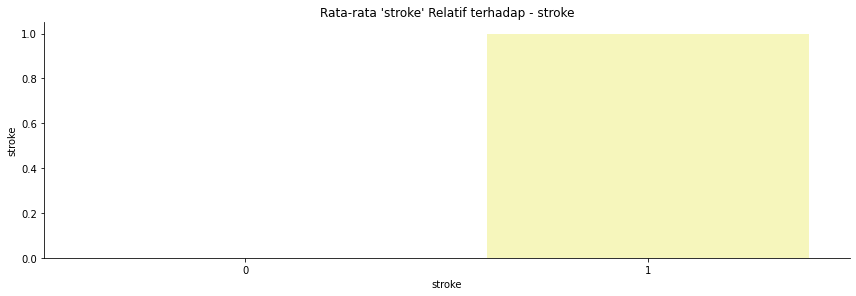

In [74]:
cat_features = df.select_dtypes(include=['object', 'int64']).columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="stroke", kind="bar", dodge=False, height = 4, aspect = 3,  data=df, palette="Set3")
  plt.title("Rata-rata 'stroke' Relatif terhadap - {}".format(col))


**- Fitur Numerik**

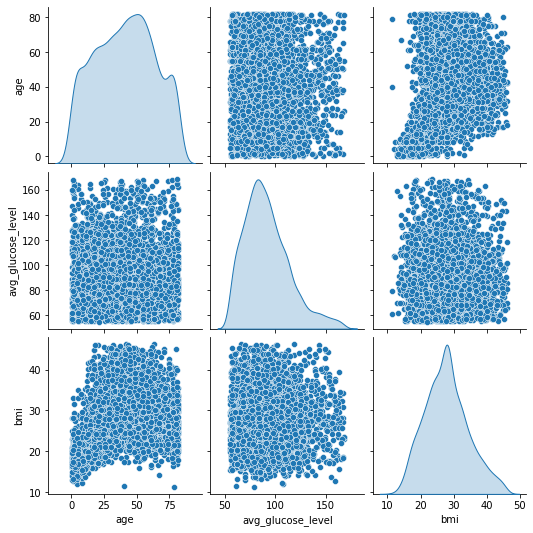

In [75]:
sns.pairplot(df[numerical_features], diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

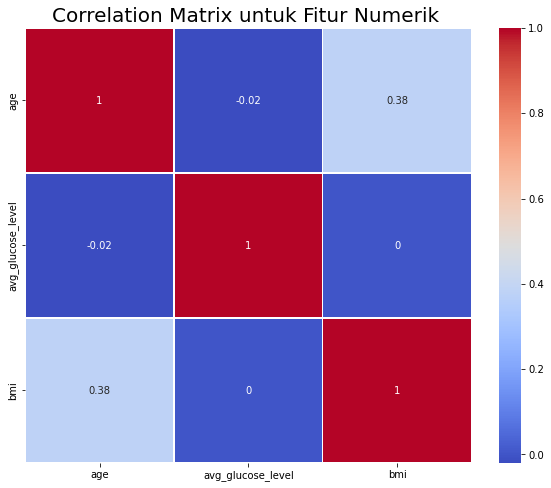

In [76]:
plt.figure(figsize=(10, 8))

correlation_matrix = df.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [77]:
#Kolom avg_glucose_level di drop karena memiliki korelasi yang sangat rendah(-0.02)
df.drop(['avg_glucose_level'], inplace=True, axis=1)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke
2,Male,80.0,0,1,Yes,Private,Rural,32.5,never smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,28.1,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,24.2,Unknown,1


**Penjelasan**

Multi Variate Analysis digunakan untuk mengetahui hubungan antara 2 atribut atau lebih.

**- Fitur Kategorik**
Saya akan mengecek rata-rata terkena penyakit stroke terhadap masing-masing fitur kategorik. Didapatkan hasil sebagai berikut:
1. **gender**: Pada atribut gender, rata-rata nilai pada kategori "Male' dan "Female" hampir mirip pada rentang 0.3-0.4.
2. **hypertension**: Pada atribut hypertension, apabila memiliki hipertensi(1) maka akan semakin tinggi rata-rata.
3. **heart_disease**: Pada atribut heart_disease, apabila memiliki penyakit jantung(1) maka akan semakin tinggi rata-rata.
4. **ever_married**: Pada atribut ever_married, apabila sudah pernah menikah, maka akan semakin tinggi rata-rata.
5. **work_type**: Pada atribut work_type, rata-rata nilai pada setiap kategori hampir sama kecuali untuk kategori "Never_worked" dan "children" yang mendekati 0. apabila memiliki kategori self_employed maka akan semakin tinggi rata-rata.
6. **Residence_type**: Pada atribut Residence_type, rata-rata nilai pada kategori "Rural' dan "Urban" hampir mirip.
7. **smoking_status**: Pada atribut gender, rata-rata nilai pada setiap kategori hampir sama. Apabila memiliki kategori "formerly_smoked" maka rata-rata akan semakin tinggi.

**- Fitur Numerik**

Pada data numerik, akan dihitung korelasi antara setiap bagian fitur. Didapatkan hasil:
1. Atribut age dan bmi memiliki korelas yang bagus sehingga nilai tersebut akan tetap dipertahankan.
2. Atribut avg_glucose_level memiliki corelasi yang buruk yaitu -0.02, karena itu atribut avg_glucose_level akan dihapus.

**4. Data Preparation**

**- Melakukan Encoding Fitur Kategorik**

In [78]:
#Mengubah kolom gender menjadi int
df['gender'].replace({'Male':1,'Female':0},inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [79]:
#Mengubah kolom ever_married menjadi int biner(0 atau 1)
df['ever_married'].replace({'Yes':1,'No':0},inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [80]:
#Melakukan one-hot encoding pada kolom work_type karena memiliki lebih dari 2 kategori (multi category)
df = pd.get_dummies(df, columns = ['work_type'])

In [81]:
#mengubah kolom Residence_type menjadi int
df['Residence_type'].replace({'Urban':1,'Rural':0},inplace = True)

In [82]:
#Melakukan proses one-hot encoding pada kolom smoking_status
df = pd.get_dummies(df, columns = ['smoking_status'])

In [83]:
#Mengubah tipe data atribut hypertension, heart_disease, dan stroke menjadi int
df['hypertension'].replace({'1':1,'0':0},inplace = True)
df['heart_disease'].replace({'1':1,'0':0},inplace = True)
df['stroke'].replace({'1':1,'0':0},inplace = True)

In [84]:
#Mengecek bentuk dataframe setelah preprocess dan memastikan semua data adalah numerik
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4390 entries, 2 to 5109
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          4390 non-null   int64  
 1   age                             4390 non-null   float64
 2   hypertension                    4390 non-null   int64  
 3   heart_disease                   4390 non-null   int64  
 4   ever_married                    4390 non-null   int64  
 5   Residence_type                  4390 non-null   int64  
 6   bmi                             4390 non-null   float64
 7   stroke                          4390 non-null   int64  
 8   work_type_Govt_job              4390 non-null   uint8  
 9   work_type_Never_worked          4390 non-null   uint8  
 10  work_type_Private               4390 non-null   uint8  
 11  work_type_Self-employed         4390 non-null   uint8  
 12  work_type_children              43

**- Train-Test Split**

In [85]:
#Membagi dataset menjadi data training dan data latih
from sklearn.model_selection import train_test_split
 
X = df.drop(["stroke"],axis =1)
y = df["stroke"].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [86]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 4390
Total # of sample in train dataset: 3512
Total # of sample in test dataset: 878


**- Standarisasi**

In [87]:
#Melakukan normalisasi pada data numerik
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['age', 'bmi']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,age,bmi
2689,-0.123525,-1.051958
3609,-1.138824,0.256117
3082,0.715200,-0.565232
591,0.317909,0.682003
3286,-0.344242,-0.215398


In [88]:
X_train[numerical_features].describe().round(4)

,age,bmi
count,3512.0000,3512.0000
mean,-0.0000,-0.0000
std,1.0001,1.0001
min,-1.7974,-2.4969
25%,-0.8298,-0.7173
50%,0.0530,-0.0177
75%,0.7593,0.6212
max,1.8188,2.8114


**Penjelasan**

**- Encoding Fitur Kategorik**

- Proses

Pada dataset kali ini, akan dilakukan proses encoding data kategorik menjadi numerik yaitu one-hot encoding. One-hot encoding adalah proses merepresentasikan data kategorik sebagai vektor biner yang bernilai integer 0 atau 1. 

Apabila data kategorik adalah biner(terdiri dari 2 kategori) maka atribut akan tetap dan salah satu kategori merepresentasikan nilai 1 dan kategori lainnya merepresentasikan nilai 0. Dalam dataset ini, atribut yang memiliki kategori biner adalah atribut **gender, ever_married, Residence_type, hypertension, heart_disease, dan stroke**

Apabila data kategorik memiliki lebih dari 2 kategori, maka akan dibuat kolom baru sesuai dengan banyaknya kategori yang ada. pada atribut tersebut nilai 1 merepresentasikan bahwa data termasuk kategori tersebut sementara nilai 0 merepresentasikan bahwa data bukanlah termasuk kategori tersebut. Dala dataset ini, atribut yang memiliki kategori lebih dari 2 adalah **work_type dan smoking_status**

- Alasan Penggunaan

Alasan penggunaan one-hot encoding adalah untuk mengubah data kategorik menjadi data numerik namun masih tetap merepresentasikan data kategorik tersebut. Hal ini dilakukan karena akan membantu model untuk memahami data menjadi lebih baik dimana mesin hanya mengerti angka dan bukan teks/huruf. Selain itu, one-hot encoding akan memudahkan penentuan probabilitas untuk setiap value.

**- Membagi Data Train dan Test**
- Proses

Sebelum data digunakan untuk membuat model, data harus terlebih dulu dibagi menjadi data latih dan data uji. Saya menggunakan rasio 80:20 untuk data latih dan data uji. pembagian data latih dan data uji menggunakan fungsi **train_test_split(X, y, test_size = 0.2, random_state = 123)** dimana X dan y adalah data yang akan di pisah, test_size adalah ukuran data latih, dan random_state adalah inisiasi internal random generator yang akan menentukan indeks dalam pembagian dataset.
- Alasan Penggunaan

Pembagian dataset menjadi data latih dan data uji bertujuan untuk memudahkan mengevaluasi seberapa baik generalisasi model terhadap data baru. Selain itu, hal ini dilakukan untuk tidak mengotori data uji dengan informasi yang kita dapat dari data latih.

**- Standarisasi**

- Proses

Standarisasi adalah proses yang dilakukan pada data numerik untuk mengurangkan mean kemudian membaginya dengan standar deviasi untuk menggeser distribusi. Pada data kali ini, saya menggunakan StandardScaler untuk melakukan standarisasi. StandardScaler akan menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0.

- Alasan Penggunaan

Standarisasi digunakan untuk membuat model machine learning memiliki performa lebih baik dan konvergen karena dimodelkan dengan data yang mendekati distribusi normal atau data dengan skala relatif.

**5. Pembuatan Model**

In [89]:
#Membuat model untuk prediksi
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'logistic_Regression'])

In [90]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)  

In [91]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)              

In [92]:
# Impor library yang dibutuhkan
from sklearn.linear_model import LogisticRegression
 
# buat model prediksi
logisticRegr = LogisticRegression(C=0.1, random_state=0)
logisticRegr.fit(X_train, y_train)
 
models.loc['train_mse','logistic_Regression'] = mean_squared_error(y_pred=logisticRegr.predict(X_train), y_true=y_train)   

**Penjelasan**

Modeling adalah proses untuk membuat model yang dapat melakukan tugas sesuai dengan keinginan kita. Pada proyek kali ini, saya menggunakan 3 algoritma sebagai perbandingan yaitu KNN, Random Forest, dan Logistic Regression. 
- Algoritma KNN

Pada implementasi algoritma KNN saya menggunakan fungsi **KNeighborsRegressor** dari **sklearn.neighbors** dengan menggunakan parameter n_neighbors sama dengan 10 yang menunjukan banyaknya tetangga terdekat yang ikut dalam penentuan kelas. Secara default, metriks penentuan jaraknya adalah euclidean.

**- Kelebihan KNN**
1. Tidak memiliki periode training, sehingga algoritma ini sangat efisien dalam hal waktu dan kompleksitas.
2. Implementasi yang mudah, KNN mudah untuk diimplementasikan karena hanya mengukur jarak antar data.
3. Karena tidak memiliki periode training, data baru bisa ditambahkan kapan saja.

**- Kekurangan KNN**
1. Tidak bekerja dengan baik saat menggunakan dataset yang besar karena sangat boros dalam hal komputasi.
2. Tidak bekerja dengan baik pad adataset dengan dimensi tinggi karena menyusahkan dalam perhitungan jarak antar data.
3. Sensitif terhadap outlier dan missing data.
4. Seluruh data harus dilakukan scaling atau normalisasi dan standarisasi.

- Algoritma Random Forest

Pada implementasi Random Forest saya menggunakan fungsi **RandomForestRegressor** dari package **sklearn.ensemble**. Dengan menggunakan parameter n_estimators sama dengan 50 yang menunjukan jumlah tree di forest, max_depth sama dengan 16 yang menunjukan kedalaman atau panjang pohon, random_state sama dengan 55 yang digunakan untuk mengontrol random number generator, dan n_jobs sama dengan -1 yang berarti semua proses dilaksanakan secara paralel.

**- Kelebihan Random Forest**
1. Dapat mengurangi variasi data sehingga dapat memperbaiki akurasi
2. Dapat menyelesaikan permasalahan data kategorik dan numerik sekaligus.
3. Dapat menangani missing values.
4. Tidak sensitif terhadap outlier dan dapat menanganinya secara otomatis.

**- Kekurangan Random Forest**
1. Kompleksitas yang tinggi karena menggunakan banyak tree dan menggabungkan berbagai output dari tree tersebut.
2. Memiliki periode training yang lebih lama karena akan menghasilkan banyak tree dan membuat keputusan berdasarkan mayoritas dari tree.

- Algoritma Logistic Regression

Pada implementasi Logistic Regression saya menggunakan fungsi **LogisticRegression** dari package **sklearn.linear_model**. Dengan menggunakan parameter C sama dengan 0.1 yang menunjukan regularization yang kuat karena nilainya yang semakin kecil (regularisasi digunakan untuk menghindari overfitting), random_state sama dengan 123 yang digunakan untuk mengontrol random number generator, dans ecara default menetapkan penalti dengan aturan L2 sebagai cara untuk belajar.

**- Kelebihan Logistic Regression**
1. Mudah untuk diimplementasikan, dijabarkan, dan efisien saat pelatihan data.
2. Dapat bekerja dengan baik saat dataset dapat dipisahkan secara linear.
3. Lebih tahan terhadap overfitting karena menerapkan Regularization.
4. Tidak hanya menunjukan relevansi predictor(coefficient size) tetapi juga menunjukan arah asosiasi(negatif atau positif).
**- Kekurangan Logistic Regression**
1. Terbatas pada data yang dapat dipisahkan secara linear.
2. Hanya dapat digunakan untuk memprediksi data yang bersifat diskrit dan memiliki permasalahan dalam menganalisa data yang kontinu.

**Algoritma Terbaik**

Berdasarkan kekurangan dan kelebihan yang dijabarkan, menurut saya algoritma yang mungkin bekerja dengan sangat baik pada data kali ini adalah algoritma KNN. Hal ini disebabkan karena dataset yang memiliki dimensionality rendah, jumlah data yang cenderung kecil, dan telah dilakukan proses untuk menangani missing value serta outlier. Selain itu, dilihat dari metriks MSE pada data latih dan data uji KNN adalah model yang menunjukan error yang kecil pada keduanya dan tidak terindikasi overfitting.

**6. Evaluasi**

**Penjelasan**

Metriks evaluasi yang saya gunakan pada proyek kali ini adalah MSE (Mean Squared Error). Sesuai dengan konteks data, problem statement, dan solusi yang diinginkan yaitu lebih menekankan untuk mengurangi kesalahan prediksi(error). MSE bekerja dengan cara mengurangi nilai aktual dengan nilai prediksi dan hasilnya dikuadratkan kemudian dijumlahkan secara keseluruhan dan membaginya dengan banyaknya data yang ada. Secara umum, formula untuk MSE adalah sebagai berikut:
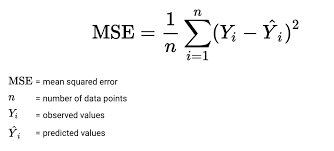

Hasil yang didapatkan pada MSE data latih dan data uji adalah sebagai berikut:
- Algoritma KNN

**- MSE Data latih:** 0.000031

**- MSE Data uji:** 0.000032

**- Analisis Hasil:** Dapat dilihat bahwa MSE yang didapatkan sangat kecil pada kedua data latih dan data uji, selain itu tidak terindikasi adanya overfitting pada data latih.


- Algoritma Random Forest

**- MSE Data latih:** 0.000006

**- MSE Data uji:** 0.000035

**- Analisis Hasil:** Dapat dilihat bahwa MSE yang didapatkan sangat kecil pada kedua data latih dan data uji, namun terdapat kemungkinan adanya overfitting pada data latih karena MSE pada data latih jauh lebih kecil dibandingkan MSE pada data uji.


- Algoritma Logistic Regression

**- MSE Data latih:** 0.000039

**- MSE Data uji:** 0.000033

**- Analisis Hasil:** Dapat dilihat bahwa MSE yang didapatkan sangat kecil pada kedua data latih dan data uji, namun terdapat kemungkinan adanya overfitting pada data latih karena MSE pada data latih sedikit lebih kecil dibandingkan MSE pada data uji.



**Kesimpulan:** Pada saat percobaan prediksi pada dataset, terlihat bahwa ketiganya sama-sama menunjukan hasil yang benar. Namun berdasarkan evaluasi mertriks MSE, didapatkan hasil bahwa algoritma terbaik pada model kali ini adalah KNN.

In [93]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [94]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','logisticRegr'])
acc = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','logisticRegr'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'logisticRegr': logisticRegr}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,0.000031,0.000032
RF,0.000006,0.000035
logisticRegr,0.000039,0.000033


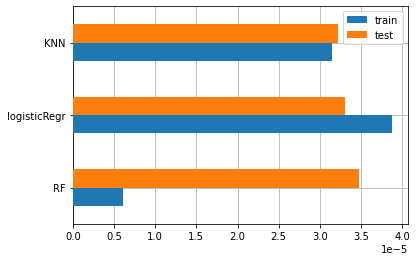

In [95]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [96]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(0)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_logisticRegr
1098,0,0.0,0.0,0
